In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import sys
sys.path.append('../')
from src.d06_reporting.Gentrification import Gentrification
from src.d04_modeling import propositional_classifier as pc
from src.d01_data.block_data_api import BlockDataApi
from src.d01_data.student_data_api import StudentDataApi, _block_features, _census_block_column
block_data_api = BlockDataApi()
block_df_dict = block_data_api.get_data(sfha=False).set_index('Block')
gentrification = Gentrification()

In [2]:
import splot
from splot.mapping import vba_choropleth

In [3]:
df = pd.read_csv("/share/data/school_choice_equity/displacement-typologies/data/outputs/typologies/SanFrancisco_typology_output.csv", sep=",")
frl_df_raw = block_data_api.get_data(frl=True)

<AxesSubplot:ylabel='CTIP_2013 assignment'>

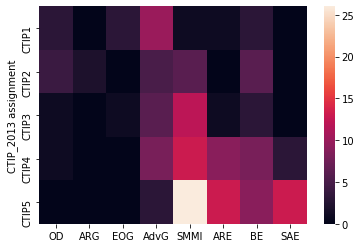

In [4]:
gentrification.gentrification_data(df, block_df_dict)

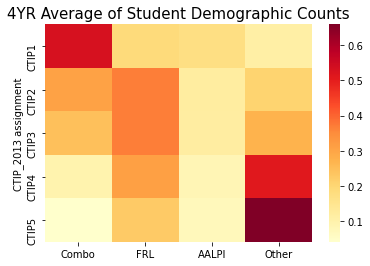

In [5]:
ax = gentrification.frl_vs_ctip(frl_df_raw, block_df_dict)
plt.show()

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


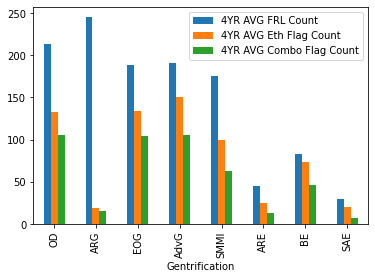

In [6]:
ax = gentrification.grouped_barchart(frl_df_raw, df)[0]
plt.show()

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


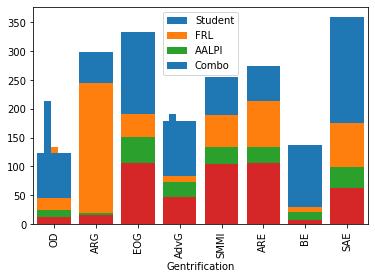

In [7]:
gentrification.stacked_barchart(frl_df_raw, df)

In [8]:
# pc6 = pc.PropositionalClassifier([("pctAALPI", "pctFRL"), "pctBoth"], ["and", "or"])
# pc6.statement

In [9]:
# params6 = [0.5, 0.8, 6] #parameters must match the features passed, in the order. Note the scale.
# pred = pc6.get_solution_set(params6)
# pred

In [10]:
#pc6_map = pc6.get_tiebreaker_map(params6, "geoid")
#pc6_map.head(10)

In [11]:
#pctFocal or pctBoth 
pc6 = pc.PropositionalClassifier([("pctFocal", "pctBoth"), ("BG_pctFocal")], ["or", "and"],  group_criterion="nbhd")
params6 = [0.6, 0.2, .5] #parameters must match the features passed, in the order. Note the scale.
pred6 = pc6.get_solution_set(params6)
pred6

Loading Block FRL data...0.1441
Loading Block Demographic data...0.5265
Loading Student Demographic data...2.2546


Int64Index([60750332011006, 60750332041015, 60750332041012, 60750332041004,
            60750332041011, 60750332031005, 60750332041014, 60750332041003,
            60750332032001, 60750332032002,
            ...
            60750313022012, 60750313022010, 60750313023016, 60750313023027,
            60750313023029, 60750313023032, 60750313022007, 60750313023025,
            60750313023024, 60750313023022],
           dtype='int64', name='geoid', length=1668)

In [12]:
pc6_map = pc6.get_tiebreaker_map(params6, "geoid")
pc6_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,statefp10,tractce10,uace10,ur10,geometry,geoid
geoid,,,,,,,,,,,,,,,,
60750604001012,24367.0,0.0,1012,075,S,060750604001012,+37.7121909,-122.4982129,G5040,Block 1012,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.50017 37.7...",NaN
60750604001011,284486.0,0.0,1011,075,S,060750604001011,+37.7142322,-122.4954137,G5040,Block 1011,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.49985 37.7...",0.0
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,06,017902,None,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,06,017902,None,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,06,017902,None,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN


In [13]:
grouped_Geoid = gentrification.gentrification_vs_demo(frl_df_raw, df)
grouped_Geoid.head(5)

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification
GEOID,,,,,
6075010300,93.50,30.50,6.50,3.00,ARE
6075010400,122.75,50.75,13.75,2.25,ARE
6075010500,89.00,63.75,8.25,7.00,ARE
6075010700,422.25,344.50,25.75,21.00,OD
6075010800,154.25,105.25,6.75,3.75,BE


In [14]:
#gentrification_cols = ["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]
#gentrification_cols = [1 ,       2,     3,     4,     5,      6,     7,    8   ]
gentrification_values = []

for i in grouped_Geoid.index: 
    val = grouped_Geoid.loc[i, "Gentrification"]
    if val == "OD":
        gentrification_values.append(1)
    elif val == "ARG":
        gentrification_values.append(2)
    elif val == "EOG":
        gentrification_values.append(3)
    elif val == "AdvG":
        gentrification_values.append(4)
    elif val == "SMMI":
        gentrification_values.append(5)
    elif val == "ARE":
        gentrification_values.append(6)
    elif val == "BE":
        gentrification_values.append(7)
    elif val == "SAE":
        gentrification_values.append(8)

grouped_Geoid["New Gent"] = gentrification_values

In [15]:
grouped_Geoid.head(10)

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
GEOID,,,,,,
6075010300,93.50,30.50,6.50,3.00,ARE,6
6075010400,122.75,50.75,13.75,2.25,ARE,6
6075010500,89.00,63.75,8.25,7.00,ARE,6
6075010700,422.25,344.50,25.75,21.00,OD,1
6075010800,154.25,105.25,6.75,3.75,BE,7
6075010900,43.75,11.50,4.00,0.75,SMMI,5
6075011000,146.00,93.75,6.75,3.75,BE,7
6075011100,118.75,83.25,23.75,16.00,ARE,6
6075011200,65.25,42.00,2.75,2.75,BE,7


In [16]:
pc6_map["New Geoid"] = pc6_map.index.astype(str).str[:10].astype(int)
pc6_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,statefp10,tractce10,uace10,ur10,geometry,geoid,New Geoid
geoid,,,,,,,,,,,,,,,,,
60750604001012,24367.0,0.0,1012,075,S,060750604001012,+37.7121909,-122.4982129,G5040,Block 1012,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.50017 37.7...",NaN,6075060400
60750604001011,284486.0,0.0,1011,075,S,060750604001011,+37.7142322,-122.4954137,G5040,Block 1011,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.49985 37.7...",0.0,6075060400
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,06,017902,None,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,6075017902
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,06,017902,None,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,6075017902
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,06,017902,None,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,6075017902


In [17]:
merged_map = pc6_map.merge(grouped_Geoid, left_on = "New Geoid", right_index = True)
merged_map = geopandas.GeoDataFrame(merged_map)
merged_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,None,"POLYGON ((-122.36660 37.82471, -122.36792 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,None,"POLYGON ((-122.36827 37.82230, -122.36883 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3


In [18]:
merged_map

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,None,"POLYGON ((-122.36660 37.82471, -122.36792 37.8...",NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,None,"POLYGON ((-122.36827 37.82230, -122.36883 37.8...",NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60750354005005,8445.0,0.0,5005,075,S,060750354005005,+37.7365851,-122.5057922,G5040,Block 5005,...,None,"POLYGON ((-122.50536 37.73707, -122.50530 37.7...",0.0,6075035400,534.50,229.25,52.25,27.00,SMMI,5
60750354005008,6889.0,0.0,5008,075,S,060750354005008,+37.7358777,-122.5036593,G5040,Block 5008,...,None,"POLYGON ((-122.50311 37.73547, -122.50322 37.7...",NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5
60750354005007,6320.0,0.0,5007,075,S,060750354005007,+37.7358576,-122.5047386,G5040,Block 5007,...,None,"POLYGON ((-122.50423 37.73618, -122.50418 37.7...",NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5


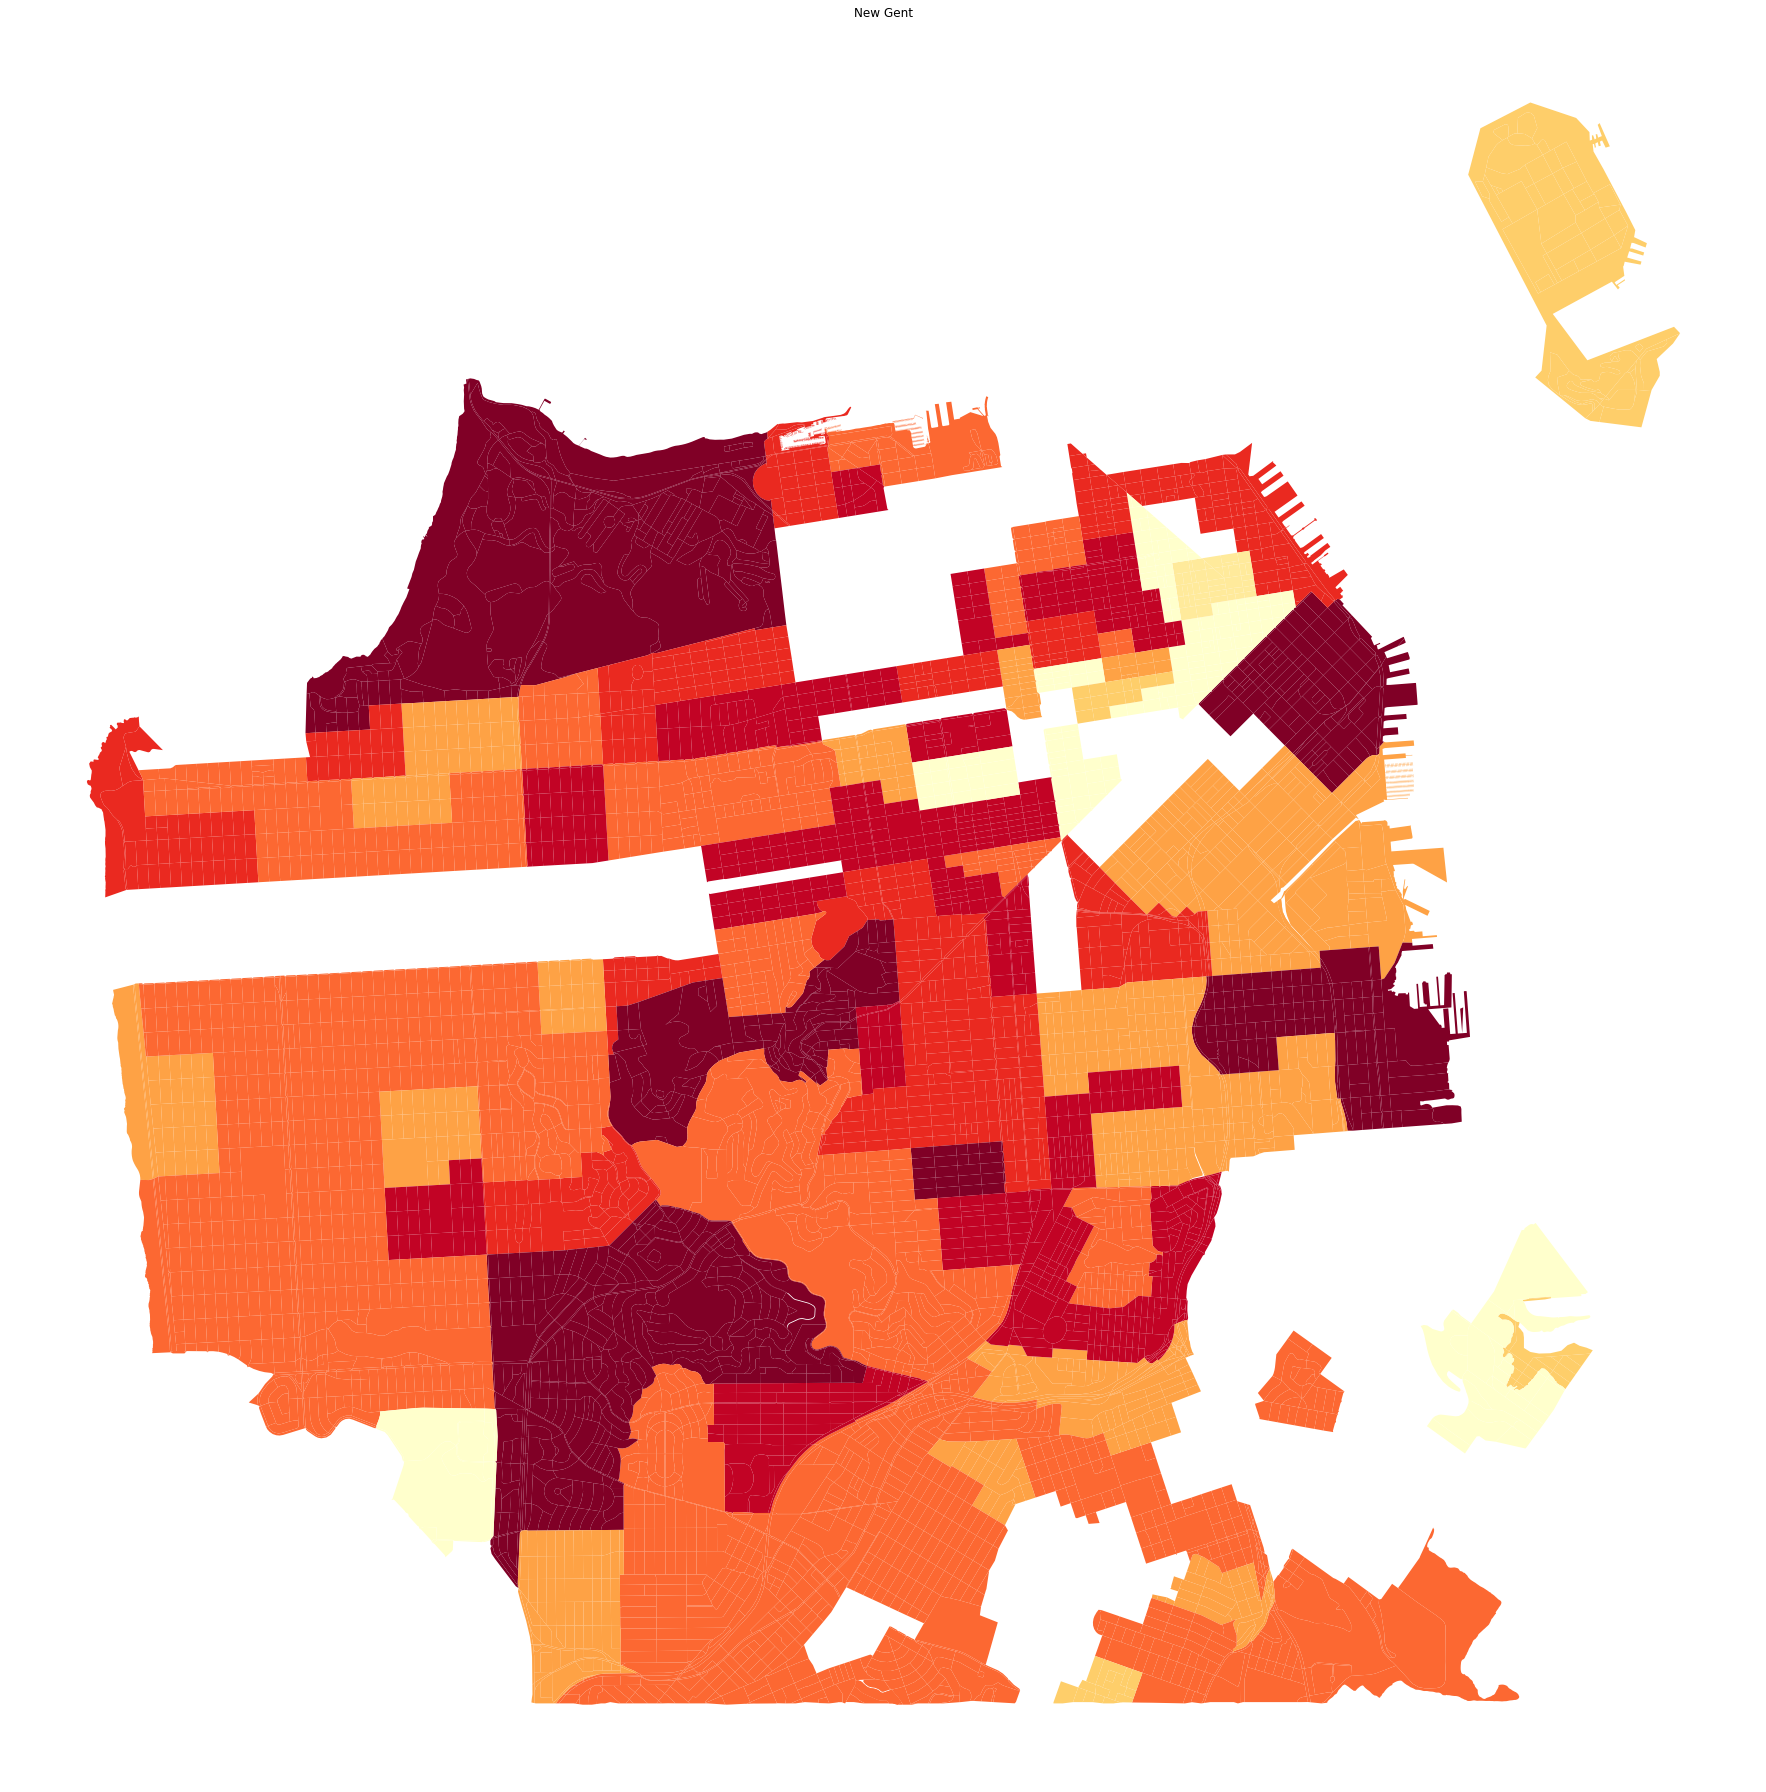

<AxesSubplot:title={'center':'New Gent'}>

In [19]:
pc6.plot_map_new(merged_map, params6)

In [20]:
solution_set = pc6.get_solution_set(params6)
solution_set

Int64Index([60750332011006, 60750332041015, 60750332041012, 60750332041004,
            60750332041011, 60750332031005, 60750332041014, 60750332041003,
            60750332032001, 60750332032002,
            ...
            60750313022012, 60750313022010, 60750313023016, 60750313023027,
            60750313023029, 60750313023032, 60750313022007, 60750313023025,
            60750313023024, 60750313023022],
           dtype='int64', name='geoid', length=1668)

In [21]:
merged_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,None,"POLYGON ((-122.36660 37.82471, -122.36792 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,None,"POLYGON ((-122.36827 37.82230, -122.36883 37.8...",NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3


In [22]:
# counter = 1
# values = []
# for i in merged_map["New Geoid"]: 
#     if counter in solution_set: 
#         values.append(1)
#     else:
#         values.append(0)
#     counter += 1

In [23]:
merged_map_filtered = merged_map[merged_map.index.isin(solution_set)]
merged_map_filtered

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021025,8271.0,0.0,1025,075,S,060750179021025,+37.8289657,-122.3719945,G5040,Block 1025,...,None,"POLYGON ((-122.37229 37.82869, -122.37263 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021042,36675.0,0.0,1042,075,S,060750179021042,+37.8257177,-122.3714599,G5040,Block 1042,...,None,"POLYGON ((-122.37103 37.82485, -122.37179 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021001,832721.0,0.0,1001,075,S,060750179021001,+37.8293650,-122.3715811,G5040,Block 1001,...,None,"POLYGON ((-122.36728 37.81093, -122.36783 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021027,27487.0,0.0,1027,075,S,060750179021027,+37.8306870,-122.3735984,G5040,Block 1027,...,None,"POLYGON ((-122.37381 37.82998, -122.37428 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021035,18670.0,0.0,1035,075,S,060750179021035,+37.8295259,-122.3742328,G5040,Block 1035,...,None,"POLYGON ((-122.37381 37.82998, -122.37311 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60750313023025,14937.0,0.0,3025,075,S,060750313023025,+37.7117829,-122.4704678,G5040,Block 3025,...,None,"POLYGON ((-122.46931 37.71253, -122.46930 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4
60750313023024,6824.0,0.0,3024,075,S,060750313023024,+37.7103835,-122.4704663,G5040,Block 3024,...,None,"POLYGON ((-122.47041 37.71015, -122.47096 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4
60750313023022,13332.0,0.0,3022,075,S,060750313023022,+37.7086488,-122.4705243,G5040,Block 3022,...,None,"POLYGON ((-122.46906 37.70823, -122.46924 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4


In [24]:
merged_map_filtered.columns

Index(['aland10', 'awater10', 'blockce10', 'countyfp10', 'funcstat10',
       'geoid10', 'intptlat10', 'intptlon10', 'mtfcc10', 'name10', 'statefp10',
       'tractce10', 'uace10', 'ur10', 'geometry', 'geoid', 'New Geoid',
       '4YR AVG Student Count', '4YR AVG FRL Count', '4YR AVG Eth Flag Count',
       '4YR AVG Combo Flag Count', 'Gentrification', 'New Gent'],
      dtype='object')

In [25]:
merged_map_filtered

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021025,8271.0,0.0,1025,075,S,060750179021025,+37.8289657,-122.3719945,G5040,Block 1025,...,None,"POLYGON ((-122.37229 37.82869, -122.37263 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021042,36675.0,0.0,1042,075,S,060750179021042,+37.8257177,-122.3714599,G5040,Block 1042,...,None,"POLYGON ((-122.37103 37.82485, -122.37179 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021001,832721.0,0.0,1001,075,S,060750179021001,+37.8293650,-122.3715811,G5040,Block 1001,...,None,"POLYGON ((-122.36728 37.81093, -122.36783 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021027,27487.0,0.0,1027,075,S,060750179021027,+37.8306870,-122.3735984,G5040,Block 1027,...,None,"POLYGON ((-122.37381 37.82998, -122.37428 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
60750179021035,18670.0,0.0,1035,075,S,060750179021035,+37.8295259,-122.3742328,G5040,Block 1035,...,None,"POLYGON ((-122.37381 37.82998, -122.37311 37.8...",1.0,6075017902,291.75,231.00,192.25,157.25,EOG,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60750313023025,14937.0,0.0,3025,075,S,060750313023025,+37.7117829,-122.4704678,G5040,Block 3025,...,None,"POLYGON ((-122.46931 37.71253, -122.46930 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4
60750313023024,6824.0,0.0,3024,075,S,060750313023024,+37.7103835,-122.4704663,G5040,Block 3024,...,None,"POLYGON ((-122.47041 37.71015, -122.47096 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4
60750313023022,13332.0,0.0,3022,075,S,060750313023022,+37.7086488,-122.4705243,G5040,Block 3022,...,None,"POLYGON ((-122.46906 37.70823, -122.46924 37.7...",1.0,6075031302,500.75,298.75,140.50,89.75,AdvG,4


<Figure size 7200x7200 with 0 Axes>

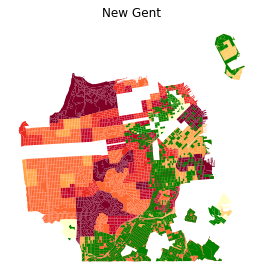

In [26]:
plt.figure(figsize=((100,100)))
new = merged_map_filtered.plot(marker = 'o', color = 'green', zorder = 2)
new_map = pc6.plot_map_new(merged_map, params6, ax=new)
plt.show()

In [27]:
student_data_api = StudentDataApi()
df_students = student_data_api.get_data().set_index('studentno')
df_students.head(5)

,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,longitude,r2_ranked_idschool,...,Academic Score,Nhood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa,year
studentno,,,,,,,,,,,,,,,,,,,,,
10019435,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,0.101064,0.387407,0.066313,NaN,NaN,NaN,NaN,NaN,NaN,2020
10031302,"[815, 559, 439, 559, 785]","[1, 2, 3, 4, 5]","['CA', 'BA', 'CA', 'CA', 'CA']",13,"[0.40869254941208505, 0.259257627732611, 0.231...",0.006416,0.0,37.708783,-122.458088,NaN,...,0.490157,0.629132,0.619612,NaN,NaN,NaN,NaN,NaN,NaN,2020
10033269,[764],[1],['CA'],13,[0.996115733080247],0.229133,0.0,37.734997,-122.382449,NaN,...,0.938095,0.932494,0.822137,NaN,NaN,NaN,NaN,NaN,NaN,2020
10034607,"[815, 853]","[1, 2]","['CA', 'CA']",13,"[0.346680243635614, 0.013923836320173]",0.373381,0.0,37.709339,-122.450776,NaN,...,0.417219,0.684535,0.671444,NaN,NaN,NaN,NaN,NaN,NaN,2020
10034799,"[559, 725, 785]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.386016426419183, 0.841100588083223, 0.01709...",0.424068,0.0,37.781808,-122.428545,NaN,...,0.800353,0.815533,0.840754,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [28]:
df_students["HOCidx1"].quantile([0,0.33,0.66,1])

0.00    0.052077
0.33    0.299559
0.66    0.560015
1.00    0.905558
Name: HOCidx1, dtype: float64

In [29]:
df_students['Index groups'] = pd.qcut(df_students["HOCidx1"], 3, labels=['low', 'medium', 'high'])
df_students[["HOCidx1", "Index groups"]]

,HOCidx1,Index groups
studentno,,
10019435,0.189939,low
10031302,0.564181,high
10033269,0.861745,high
10034607,0.546263,medium
10034799,0.754404,high
...,...,...
888042949,0.878421,high
888042967,NaN,NaN
888042990,0.298515,low


In [30]:
df_students_new = df_students.dropna(subset = ["HOCidx1", "Index groups"])
df_students_new

,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,longitude,r2_ranked_idschool,...,Nhood SES Score,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa,year,Index groups
studentno,,,,,,,,,,,,,,,,,,,,,
10019435,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,0.387407,0.066313,NaN,NaN,NaN,NaN,NaN,NaN,2020,low
10031302,"[815, 559, 439, 559, 785]","[1, 2, 3, 4, 5]","['CA', 'BA', 'CA', 'CA', 'CA']",13,"[0.40869254941208505, 0.259257627732611, 0.231...",0.006416,0.0,37.708783,-122.458088,NaN,...,0.629132,0.619612,NaN,NaN,NaN,NaN,NaN,NaN,2020,high
10033269,[764],[1],['CA'],13,[0.996115733080247],0.229133,0.0,37.734997,-122.382449,NaN,...,0.932494,0.822137,NaN,NaN,NaN,NaN,NaN,NaN,2020,high
10034607,"[815, 853]","[1, 2]","['CA', 'CA']",13,"[0.346680243635614, 0.013923836320173]",0.373381,0.0,37.709339,-122.450776,NaN,...,0.684535,0.671444,NaN,NaN,NaN,NaN,NaN,NaN,2020,medium
10034799,"[559, 725, 785]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.386016426419183, 0.841100588083223, 0.01709...",0.424068,0.0,37.781808,-122.428545,NaN,...,0.815533,0.840754,NaN,NaN,NaN,NaN,NaN,NaN,2020,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888042945,NaN,NaN,NaN,4,NaN,0.075494,0.0,37.719625,-122.384285,[453],...,0.845963,0.783516,NaN,NaN,NaN,NaN,NaN,[453],2020,high
888042948,NaN,NaN,NaN,KG,NaN,0.633749,0.0,37.719625,-122.384285,[453],...,0.845963,0.783516,NaN,NaN,NaN,NaN,NaN,[453],2020,high
888042949,NaN,NaN,NaN,3,NaN,0.616349,0.0,37.732712,-122.384867,"[505, 507, 830]",...,0.912961,0.789762,NaN,NaN,NaN,NaN,NaN,NaN,2020,high


In [31]:
df_students_new.columns

Index(['r1_ranked_idschool', 'r1_listed_ranks', 'r1_programs', 'grade',
       'r1_randomnumber', 'randomnumber', 'requestprogramdesignation',
       'latitude', 'longitude', 'r2_ranked_idschool', 'r2_listed_ranks',
       'r2_programs', 'r2_randomnumber', 'r1_idschool', 'r1_programcode',
       'r1_rank', 'r1_isdesignation', 'r1_distance', 'ctip1',
       'idschoolattendance', 'r2_idschool', 'r2_programcode', 'r2_rank',
       'r2_isdesignation', 'r2_distance', 'zipcode', 'sex', 'speced',
       'ethnicity_desc', 'disability', 'homelang_desc', 'englprof_desc',
       'enrolled_idschool', 'resolved_ethnicity', 'math_scalescore',
       'ela_scalescore', 'final_school', 'num_ranked', 'census_block',
       'freelunch_prob', 'reducedlunch_prob', 'census_blockgroup',
       'census_tract', 'HOCidx1', 'HOCidx2', 'HOCidx3', 'AALPI Score',
       'Academic Score', 'Nhood SES Score', 'FRL Score', 'sibling',
       'currentlpsibling', 'currentlp', 'msf', 'aaprek', 'aa', 'year',
       'Index g

In [32]:
df_students_new[["AALPI Score", "Academic Score", "Nhood SES Score", "FRL Score", "census_blockgroup"]]

,AALPI Score,Academic Score,Nhood SES Score,FRL Score,census_blockgroup
studentno,,,,,
10019435,0.204972,0.101064,0.387407,0.066313,60750307003
10031302,0.517824,0.490157,0.629132,0.619612,60750262004
10033269,0.754253,0.938095,0.932494,0.822137,60750231031
10034607,0.411856,0.417219,0.684535,0.671444,60750263031
10034799,0.560976,0.800353,0.815533,0.840754,60750161004
...,...,...,...,...,...
888042945,0.806564,0.896648,0.845963,0.783516,60750234002
888042948,0.806564,0.896648,0.845963,0.783516,60750234002
888042949,0.865119,0.945841,0.912961,0.789762,60750231022


In [33]:
type(int(df_students_new["census_blockgroup"].iloc[0]))

int

In [34]:
df_students_new["Census Blockgroup"] = df_students_new["census_blockgroup"].str[:10].astype(int)
df_students_new

<ipython-input-34-42a1ba5ce8c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students_new["Census Blockgroup"] = df_students_new["census_blockgroup"].str[:10].astype(int)


,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,longitude,r2_ranked_idschool,...,FRL Score,sibling,currentlpsibling,currentlp,msf,aaprek,aa,year,Index groups,Census Blockgroup
studentno,,,,,,,,,,,,,,,,,,,,,
10019435,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,0.066313,NaN,NaN,NaN,NaN,NaN,NaN,2020,low,6075030700
10031302,"[815, 559, 439, 559, 785]","[1, 2, 3, 4, 5]","['CA', 'BA', 'CA', 'CA', 'CA']",13,"[0.40869254941208505, 0.259257627732611, 0.231...",0.006416,0.0,37.708783,-122.458088,NaN,...,0.619612,NaN,NaN,NaN,NaN,NaN,NaN,2020,high,6075026200
10033269,[764],[1],['CA'],13,[0.996115733080247],0.229133,0.0,37.734997,-122.382449,NaN,...,0.822137,NaN,NaN,NaN,NaN,NaN,NaN,2020,high,6075023103
10034607,"[815, 853]","[1, 2]","['CA', 'CA']",13,"[0.346680243635614, 0.013923836320173]",0.373381,0.0,37.709339,-122.450776,NaN,...,0.671444,NaN,NaN,NaN,NaN,NaN,NaN,2020,medium,6075026303
10034799,"[559, 725, 785]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.386016426419183, 0.841100588083223, 0.01709...",0.424068,0.0,37.781808,-122.428545,NaN,...,0.840754,NaN,NaN,NaN,NaN,NaN,NaN,2020,high,6075016100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888042945,NaN,NaN,NaN,4,NaN,0.075494,0.0,37.719625,-122.384285,[453],...,0.783516,NaN,NaN,NaN,NaN,NaN,[453],2020,high,6075023400
888042948,NaN,NaN,NaN,KG,NaN,0.633749,0.0,37.719625,-122.384285,[453],...,0.783516,NaN,NaN,NaN,NaN,NaN,[453],2020,high,6075023400
888042949,NaN,NaN,NaN,3,NaN,0.616349,0.0,37.732712,-122.384867,"[505, 507, 830]",...,0.789762,NaN,NaN,NaN,NaN,NaN,NaN,2020,high,6075023102


In [35]:
type(merged_map_filtered["New Geoid"].iloc[0])

numpy.int64

In [36]:
merged_students = df_students_new.merge(merged_map, left_on = "Census Blockgroup", right_on = "New Geoid")
merged_students

,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,longitude,r2_ranked_idschool,...,ur10,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
0,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,None,"POLYGON ((-122.43839 37.73442, -122.43841 37.7...",NaN,6075030700,504.75,68.50,71.5,18.25,SAE,8
1,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,None,"POLYGON ((-122.43976 37.73403, -122.44075 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8
2,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,None,"POLYGON ((-122.43993 37.73486, -122.44005 37.7...",NaN,6075030700,504.75,68.50,71.5,18.25,SAE,8
3,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,None,"POLYGON ((-122.44193 37.73597, -122.44187 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8
4,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,None,"POLYGON ((-122.44120 37.73441, -122.44201 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546503,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,None,"POLYGON ((-122.48655 37.72959, -122.48642 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1
546504,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,None,"POLYGON ((-122.47870 37.72821, -122.47915 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1
546505,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,None,"POLYGON ((-122.47899 37.72088, -122.47903 37.7...",1.0,6075033201,19.25,10.75,7.5,4.75,OD,1
546506,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,None,"POLYGON ((-122.47899 37.72088, -122.47905 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1


In [37]:
merged_students["Census Blockgroup"].value_counts()

6075025500    25680
6075026200    17550
6075030900    17205
6075060700    16268
6075026100    15521
              ...  
6075033201      126
6075012601      104
6075011902       96
6075012302       96
6075011901       44
Name: Census Blockgroup, Length: 159, dtype: int64

In [38]:
merged_students[["AALPI Score", "Academic Score", "Nhood SES Score", "FRL Score", "Census Blockgroup"]]

,AALPI Score,Academic Score,Nhood SES Score,FRL Score,Census Blockgroup
0,0.204972,0.101064,0.387407,0.066313,6075030700
1,0.204972,0.101064,0.387407,0.066313,6075030700
2,0.204972,0.101064,0.387407,0.066313,6075030700
3,0.204972,0.101064,0.387407,0.066313,6075030700
4,0.204972,0.101064,0.387407,0.066313,6075030700
...,...,...,...,...,...
546503,0.623306,0.666667,0.951233,0.673491,6075033201
546504,0.623306,0.666667,0.951233,0.673491,6075033201
546505,0.623306,0.666667,0.951233,0.673491,6075033201
546506,0.623306,0.666667,0.951233,0.673491,6075033201


In [39]:
merged_students.columns

Index(['r1_ranked_idschool', 'r1_listed_ranks', 'r1_programs', 'grade',
       'r1_randomnumber', 'randomnumber', 'requestprogramdesignation',
       'latitude', 'longitude', 'r2_ranked_idschool', 'r2_listed_ranks',
       'r2_programs', 'r2_randomnumber', 'r1_idschool', 'r1_programcode',
       'r1_rank', 'r1_isdesignation', 'r1_distance', 'ctip1',
       'idschoolattendance', 'r2_idschool', 'r2_programcode', 'r2_rank',
       'r2_isdesignation', 'r2_distance', 'zipcode', 'sex', 'speced',
       'ethnicity_desc', 'disability', 'homelang_desc', 'englprof_desc',
       'enrolled_idschool', 'resolved_ethnicity', 'math_scalescore',
       'ela_scalescore', 'final_school', 'num_ranked', 'census_block',
       'freelunch_prob', 'reducedlunch_prob', 'census_blockgroup',
       'census_tract', 'HOCidx1', 'HOCidx2', 'HOCidx3', 'AALPI Score',
       'Academic Score', 'Nhood SES Score', 'FRL Score', 'sibling',
       'currentlpsibling', 'currentlp', 'msf', 'aaprek', 'aa', 'year',
       'Index g

In [40]:
merged_students["geoid14"] = merged_students["geoid10"].str[1:15].astype(int)
merged_students

,r1_ranked_idschool,r1_listed_ranks,r1_programs,grade,r1_randomnumber,randomnumber,requestprogramdesignation,latitude,longitude,r2_ranked_idschool,...,geometry,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent,geoid14
0,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,"POLYGON ((-122.43839 37.73442, -122.43841 37.7...",NaN,6075030700,504.75,68.50,71.5,18.25,SAE,8,60750307002016
1,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,"POLYGON ((-122.43976 37.73403, -122.44075 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8,60750307002004
2,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,"POLYGON ((-122.43993 37.73486, -122.44005 37.7...",NaN,6075030700,504.75,68.50,71.5,18.25,SAE,8,60750307002000
3,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,"POLYGON ((-122.44193 37.73597, -122.44187 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8,60750307002001
4,"[815, 697, 559]","[1, 2, 3]","['CA', 'CA', 'CA']",13,"[0.8926267881169321, 0.5997281950450141, 0.095...",0.298533,0.0,37.736967,-122.450030,"[815, 559, 697, 559, 785]",...,"POLYGON ((-122.44120 37.73441, -122.44201 37.7...",0.0,6075030700,504.75,68.50,71.5,18.25,SAE,8,60750307002005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546503,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,"POLYGON ((-122.48655 37.72959, -122.48642 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1,60750332011003
546504,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,"POLYGON ((-122.47870 37.72821, -122.47915 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1,60750332011005
546505,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,"POLYGON ((-122.47899 37.72088, -122.47903 37.7...",1.0,6075033201,19.25,10.75,7.5,4.75,OD,1,60750332011015
546506,"[746, 569, 539, 876, 549]","[1, 2, 3, 4, 5]","['GE', 'GE', 'GE', 'GE', 'GE']",KG,"[0.42129663315584703, 0.834998510719618, 0.435...",0.915646,0.0,37.726938,-122.479301,NaN,...,"POLYGON ((-122.47899 37.72088, -122.47905 37.7...",NaN,6075033201,19.25,10.75,7.5,4.75,OD,1,60750332011013


In [63]:
grouped_students = merged_students.groupby("Census Blockgroup")[["AALPI Score", "Academic Score", "Nhood SES Score", "FRL Score"]].mean()
new_solution_set = [int(str(x)[:10]) for x in solution_set]
grouped_students["Solution"] = grouped_students.index.isin(new_solution_set)
grouped_students

,AALPI Score,Academic Score,Nhood SES Score,FRL Score,Solution
Census Blockgroup,,,,,
6075010300,0.008686,0.173249,0.417691,0.342536,False
6075010400,0.164663,0.281892,0.355596,0.398315,True
6075010500,0.160392,0.167984,0.470624,0.857775,True
6075010700,0.081350,0.388444,0.789801,0.827507,True
6075010800,0.070695,0.140758,0.425719,0.595660,True
...,...,...,...,...,...
6075060700,0.351851,0.460493,0.409121,0.672535,True
6075061000,0.435706,0.455808,0.511770,0.645927,True
6075061100,0.057069,0.459575,1.000000,0.952283,True


In [64]:
grouped_students["Solution"].value_counts()

True     81
False    78
Name: Solution, dtype: int64

In [65]:
grouped_students.groupby("Solution").mean()

,AALPI Score,Academic Score,Nhood SES Score,FRL Score
Solution,,,,
False,0.147228,0.160315,0.416883,0.240602
True,0.459400,0.450938,0.575374,0.602532


In [66]:
grouped_students_solution = grouped_students[grouped_students["Solution"] == True]
grouped_students_solution

,AALPI Score,Academic Score,Nhood SES Score,FRL Score,Solution
Census Blockgroup,,,,,
6075010400,0.164663,0.281892,0.355596,0.398315,True
6075010500,0.160392,0.167984,0.470624,0.857775,True
6075010700,0.081350,0.388444,0.789801,0.827507,True
6075010800,0.070695,0.140758,0.425719,0.595660,True
6075011100,0.300842,0.298577,0.410676,0.751856,True
...,...,...,...,...,...
6075060700,0.351851,0.460493,0.409121,0.672535,True
6075061000,0.435706,0.455808,0.511770,0.645927,True
6075061100,0.057069,0.459575,1.000000,0.952283,True


In [74]:
grouped_students_solution['AALPI Quantiles'] = pd.qcut(grouped_students_solution["AALPI Score"], 3, labels=['low', 'medium', 'high'])
grouped_students_solution['Academic Quantiles'] = pd.qcut(grouped_students_solution["Academic Score"], 3, labels=['low', 'medium', 'high'])
grouped_students_solution['Nhood SES Quantiles'] = pd.qcut(grouped_students_solution["Nhood SES Score"], 3, labels=['low', 'medium', 'high'])
#grouped_students_solution['FRL Score'] = pd.qcut(grouped_students_solution["FRL Score"], 3, labels=['low', 'medium', 'high'])
grouped_students_solution


<ipython-input-74-34f468d40624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_students_solution['AALPI Quantiles'] = pd.qcut(grouped_students_solution["AALPI Score"], 3, labels=['low', 'medium', 'high'])
<ipython-input-74-34f468d40624>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_students_solution['Academic Quantiles'] = pd.qcut(grouped_students_solution["Academic Score"], 3, labels=['low', 'medium', 'high'])
<ipython-input-74-34f468d40624>:3: SettingWithCopyWarning: 
A value is tryin

,AALPI Score,Academic Score,Nhood SES Score,FRL Score,Solution,AALPI Quantiles,Academic Quantiles,Nhood SES Quantiles,FRL SCore
Census Blockgroup,,,,,,,,,
6075010400,0.164663,0.281892,0.355596,low,True,low,low,low,low
6075010500,0.160392,0.167984,0.470624,high,True,low,low,low,high
6075010700,0.081350,0.388444,0.789801,high,True,low,medium,high,high
6075010800,0.070695,0.140758,0.425719,medium,True,low,low,low,medium
6075011100,0.300842,0.298577,0.410676,high,True,low,low,low,high
...,...,...,...,...,...,...,...,...,...
6075060700,0.351851,0.460493,0.409121,high,True,low,medium,low,high
6075061000,0.435706,0.455808,0.511770,medium,True,medium,medium,medium,medium
6075061100,0.057069,0.459575,1.000000,high,True,low,medium,high,high
